
=== Résumé conservation énergie ===
                      H0    min(H)    max(H)  min rel err  max rel err  \
Euler explicite     1.72  1.719207  2.435565    -0.000461     0.416026   
Euler symplectique  1.72  1.716603  1.723401    -0.001975     0.001978   
Verlet              1.72  1.719996  1.720002    -0.000002     0.000001   

                    RMS rel err  
Euler explicite        0.223655  
Euler symplectique     0.000921  
Verlet                 0.000001  


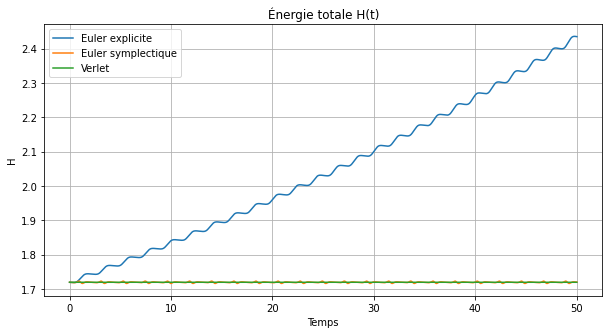

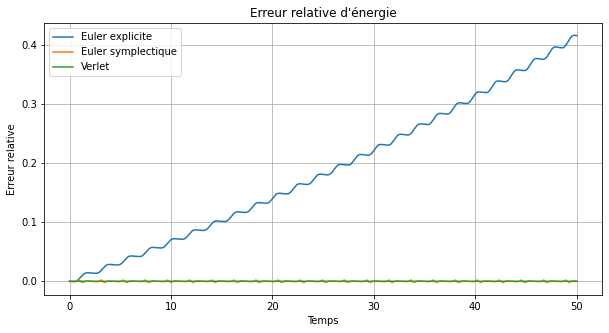

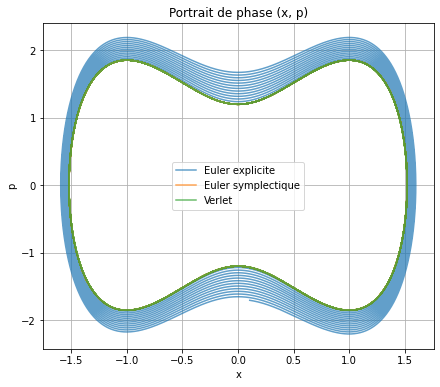

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --------- Hamiltonian system ---------
# Potential V(x) = (x^2 - 1)^2
def V(x):
    return (x**2 - 1)**2

def dVdx(x):
    return 4*x*(x**2 - 1)

# --------- Simulation parameters ---------
dt = 0.001   # time step
T  = 50.0    # final time
N  = int(T/dt)
t  = np.linspace(0, T, N+1)

# Initial conditions
x0, p0 = 0.0, 1.2

# --------- Allocate arrays ---------
x_eu = np.zeros(N+1); p_eu = np.zeros(N+1); H_eu = np.zeros(N+1)
x_se = np.zeros(N+1); p_se = np.zeros(N+1); H_se = np.zeros(N+1)
x_vl = np.zeros(N+1); p_vl = np.zeros(N+1); H_vl = np.zeros(N+1)

# Initial values
x_eu[0], p_eu[0], H_eu[0] = x0, p0, 0.5*p0**2 + V(x0)
x_se[0], p_se[0], H_se[0] = x0, p0, H_eu[0]
x_vl[0], p_vl[0], H_vl[0] = x0, p0, H_eu[0]

# --------- Integrators ---------
# Euler explicit
for n in range(N):
    x_eu[n+1] = x_eu[n] + dt*p_eu[n]
    p_eu[n+1] = p_eu[n] - dt*dVdx(x_eu[n])
    H_eu[n+1] = 0.5*p_eu[n+1]**2 + V(x_eu[n+1])

# Euler symplectic
for n in range(N):
    p_se[n+1] = p_se[n] - dt*dVdx(x_se[n])
    x_se[n+1] = x_se[n] + dt*p_se[n+1]
    H_se[n+1] = 0.5*p_se[n+1]**2 + V(x_se[n+1])

# Verlet (velocity-Verlet)
for n in range(N):
    p_half = p_vl[n] - 0.5*dt*dVdx(x_vl[n])
    x_vl[n+1] = x_vl[n] + dt*p_half
    p_vl[n+1] = p_half - 0.5*dt*dVdx(x_vl[n+1])
    H_vl[n+1] = 0.5*p_vl[n+1]**2 + V(x_vl[n+1])

# --------- Energy statistics ---------
def energy_stats(H):
    H0 = H[0]
    rel = (H - H0)/abs(H0)
    return {
        "H0": H0,
        "min(H)": H.min(),
        "max(H)": H.max(),
        "min rel err": rel.min(),
        "max rel err": rel.max(),
        "RMS rel err": np.sqrt(np.mean(rel**2))
    }

stats = pd.DataFrame([
    energy_stats(H_eu),
    energy_stats(H_se),
    energy_stats(H_vl)
], index=["Euler explicite", "Euler symplectique", "Verlet"])

print("\n=== Résumé conservation énergie ===")
print(stats)

# --------- Plots ---------
plt.figure(figsize=(10,5))
plt.plot(t, H_eu, label="Euler explicite")
plt.plot(t, H_se, label="Euler symplectique")
plt.plot(t, H_vl, label="Verlet")
plt.title("Énergie totale H(t)")
plt.xlabel("Temps"); plt.ylabel("H")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, (H_eu-H_eu[0])/H_eu[0], label="Euler explicite")
plt.plot(t, (H_se-H_se[0])/H_se[0], label="Euler symplectique")
plt.plot(t, (H_vl-H_vl[0])/H_vl[0], label="Verlet")
plt.title("Erreur relative d'énergie")
plt.xlabel("Temps"); plt.ylabel("Erreur relative")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(7,6))
plt.plot(x_eu, p_eu, label="Euler explicite", alpha=0.7)
plt.plot(x_se, p_se, label="Euler symplectique", alpha=0.7)
plt.plot(x_vl, p_vl, label="Verlet", alpha=0.7)
plt.title("Portrait de phase (x, p)")
plt.xlabel("x"); plt.ylabel("p")
plt.legend(); plt.grid(True); plt.show()
